# Librearías

In [144]:
import pandas as pd
import numpy as np
import os

from sklearn.impute import SimpleImputer

from scipy.stats import ks_2samp

from sklearn.feature_selection import VarianceThreshold

import seaborn as sns

from varclushi import VarClusHi

from sklearn.preprocessing import KBinsDiscretizer

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression

from scikitplot.metrics import plot_roc_curve

In [145]:
pd.set_option('display.max_columns',100)

# Funciones

In [146]:
from funciones import *

# Lectura de datos

In [ ]:
df = pd.read_csv('healthcare.csv') 

In [149]:
df.shape

(5110, 12)

In [150]:
df.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4310,59058,Female,45.0,0,0,Yes,Govt_job,Rural,68.66,25.3,never smoked,0
5061,38009,Male,41.0,0,0,Yes,Private,Urban,223.78,32.3,never smoked,0
3797,41962,Female,32.0,0,0,Yes,Private,Rural,108.80,24.0,Unknown,0
3141,57896,Male,32.0,0,0,Yes,Private,Urban,64.02,23.8,smokes,0
1010,84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0
2920,51257,Male,32.0,0,0,No,Private,Rural,72.10,23.2,never smoked,0
2004,32270,Male,53.0,0,0,Yes,Private,Rural,198.24,38.1,never smoked,0
3490,17745,Male,79.0,1,0,Yes,Self-employed,Urban,84.88,28.7,formerly smoked,0
4762,27509,Female,76.0,1,0,Yes,Self-employed,Urban,78.68,23.3,never smoked,0
4257,24854,Female,24.0,0,0,No,Self-employed,Urban,79.42,21.4,never smoked,0


In [151]:
df.stroke.value_counts(True)*100

0    95.127202
1     4.872798
Name: stroke, dtype: float64

# Limpieza / Pretratamiento

In [152]:
um = ['id']
tgt = ['stroke']

In [153]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [154]:
# Continuas / Numéricas
varc = ['age','avg_glucose_level','bmi']

# Discretas / Categóricas
vard = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']

# Ingeniería de variables

In [155]:
df['ratio_age_glu'] = df['age'] / df['avg_glucose_level']
df['ratio_age_bmi'] = df['age'] / df['bmi']

In [156]:
varc = varc + ['ratio_age_bmi','ratio_age_glu']

In [157]:
len(varc), varc

(5, ['age', 'avg_glucose_level', 'bmi', 'ratio_age_bmi', 'ratio_age_glu'])

In [158]:
len(vard), vard

(7,
 ['gender',
  'hypertension',
  'heart_disease',
  'ever_married',
  'work_type',
  'Residence_type',
  'smoking_status'])

# Análisis Exploratorio

## Discreto

### Reemplazo de NaN por "Sin categoría"

In [159]:
for v in vard:
    df[v] = df[v].fillna("Sin categoría")

### Análisis de frecuencias

In [160]:
for v in vard:
    freq( df, v )

Tabla de frecuencias para la variable gender 

          FA        FR   FAA       FRA
Female  2994  0.585910  2994  0.585910
Male    2115  0.413894  5109  0.999804
Other      1  0.000196  5110  1.000000 

Tabla de frecuencias para la variable hypertension 

     FA        FR   FAA       FRA
0  4612  0.902544  4612  0.902544
1   498  0.097456  5110  1.000000 

Tabla de frecuencias para la variable heart_disease 

     FA        FR   FAA       FRA
0  4834  0.945988  4834  0.945988
1   276  0.054012  5110  1.000000 

Tabla de frecuencias para la variable ever_married 

       FA        FR   FAA       FRA
Yes  3353  0.656164  3353  0.656164
No   1757  0.343836  5110  1.000000 

Tabla de frecuencias para la variable work_type 

                 FA        FR   FAA       FRA
Private        2925  0.572407  2925  0.572407
Self-employed   819  0.160274  3744  0.732681
children        687  0.134442  4431  0.867123
Govt_job        657  0.128571  5088  0.995695
Never_worked     22  0.004305  5110  

### Normalizar

In [161]:
for v in vard:
    df = norm( df, v , .05)

In [162]:
df.shape

(5110, 21)

In [163]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,ratio_age_glu,ratio_age_bmi,n_gender,n_hypertension,n_heart_disease,n_ever_married,n_work_type,n_Residence_type,n_smoking_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,0.292973,1.830601,Male,0,1,Yes,Private,Urban,formerly smoked
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0.301667,NaN,Female,0,0,Yes,Self-employed,Rural,never smoked
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0.755287,2.461538,Male,0,1,Yes,Private,Rural,never smoked
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0.286165,1.424419,Female,0,0,Yes,Private,Urban,smokes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0.453710,3.291667,Female,1,0,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,0.955224,NaN,Female,1,0,Yes,Private,Urban,never smoked
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,0.646965,2.025000,Female,0,0,Yes,Self-employed,Urban,never smoked
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,0.421738,1.143791,Female,0,0,Yes,Self-employed,Rural,never smoked
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,0.306693,1.992188,Male,0,0,Yes,Private,Rural,formerly smoked


In [164]:
# Variables normalizadas
varn = [v for v in df.filter(like='n_').columns.tolist() ]

In [165]:
varn = [v for v in df.filter(like='n_').columns.tolist() ]

(7,
 ['n_gender',
  'n_hypertension',
  'n_heart_disease',
  'n_ever_married',
  'n_work_type',
  'n_Residence_type',
  'n_smoking_status'])

In [166]:
for v in varn:
    freq( df, v )

Tabla de frecuencias para la variable n_gender 

          FA        FR   FAA       FRA
Female  2995  0.586106  2995  0.586106
Male    2115  0.413894  5110  1.000000 

Tabla de frecuencias para la variable n_hypertension 

     FA        FR   FAA       FRA
0  4612  0.902544  4612  0.902544
1   498  0.097456  5110  1.000000 

Tabla de frecuencias para la variable n_heart_disease 

     FA        FR   FAA       FRA
0  4834  0.945988  4834  0.945988
1   276  0.054012  5110  1.000000 

Tabla de frecuencias para la variable n_ever_married 

       FA        FR   FAA       FRA
Yes  3353  0.656164  3353  0.656164
No   1757  0.343836  5110  1.000000 

Tabla de frecuencias para la variable n_work_type 

                 FA        FR   FAA       FRA
Private        2947  0.576712  2947  0.576712
Self-employed   819  0.160274  3766  0.736986
children        687  0.134442  4453  0.871429
Govt_job        657  0.128571  5110  1.000000 

Tabla de frecuencias para la variable n_Residence_type 

       

### Unarias

In [167]:
unarias = [c for c, conteo in zip(varn, [df[v].unique().shape[0] for v in varn ]  ) if conteo == 1  ]

In [168]:
len(unarias), unarias

(0, [])

In [169]:
varn = [v for v in varn if v  not in unarias]

## Continuo

In [170]:
X = df[varc].copy()

In [171]:
X.shape

(5110, 5)

## Análisis Univariado

In [172]:
X.describe(percentiles=[0.01,.1,.9,0.99])

,age,avg_glucose_level,bmi,ratio_age_bmi,ratio_age_glu
count,5110.000000,5110.000000,4909.000000,4909.000000,5110.000000
mean,43.226614,106.147677,28.893237,1.489989,0.451352
std,22.612647,45.283560,7.854067,0.832468,0.281029
min,0.080000,55.120000,10.300000,0.004734,0.000573
1%,1.080000,56.330900,15.100000,0.057645,0.010853
10%,11.000000,65.789000,19.700000,0.464232,0.108502
50%,45.000000,91.885000,28.100000,1.422764,0.403809
90%,75.000000,192.181000,38.900000,2.606143,0.837678
99%,82.000000,240.708200,53.400000,3.604024,1.213338
max,82.000000,271.740000,97.600000,6.991150,1.444934


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'ratio_age_bmi'}>],
       [<AxesSubplot:title={'center':'ratio_age_glu'}>, <AxesSubplot:>]],
      dtype=object)

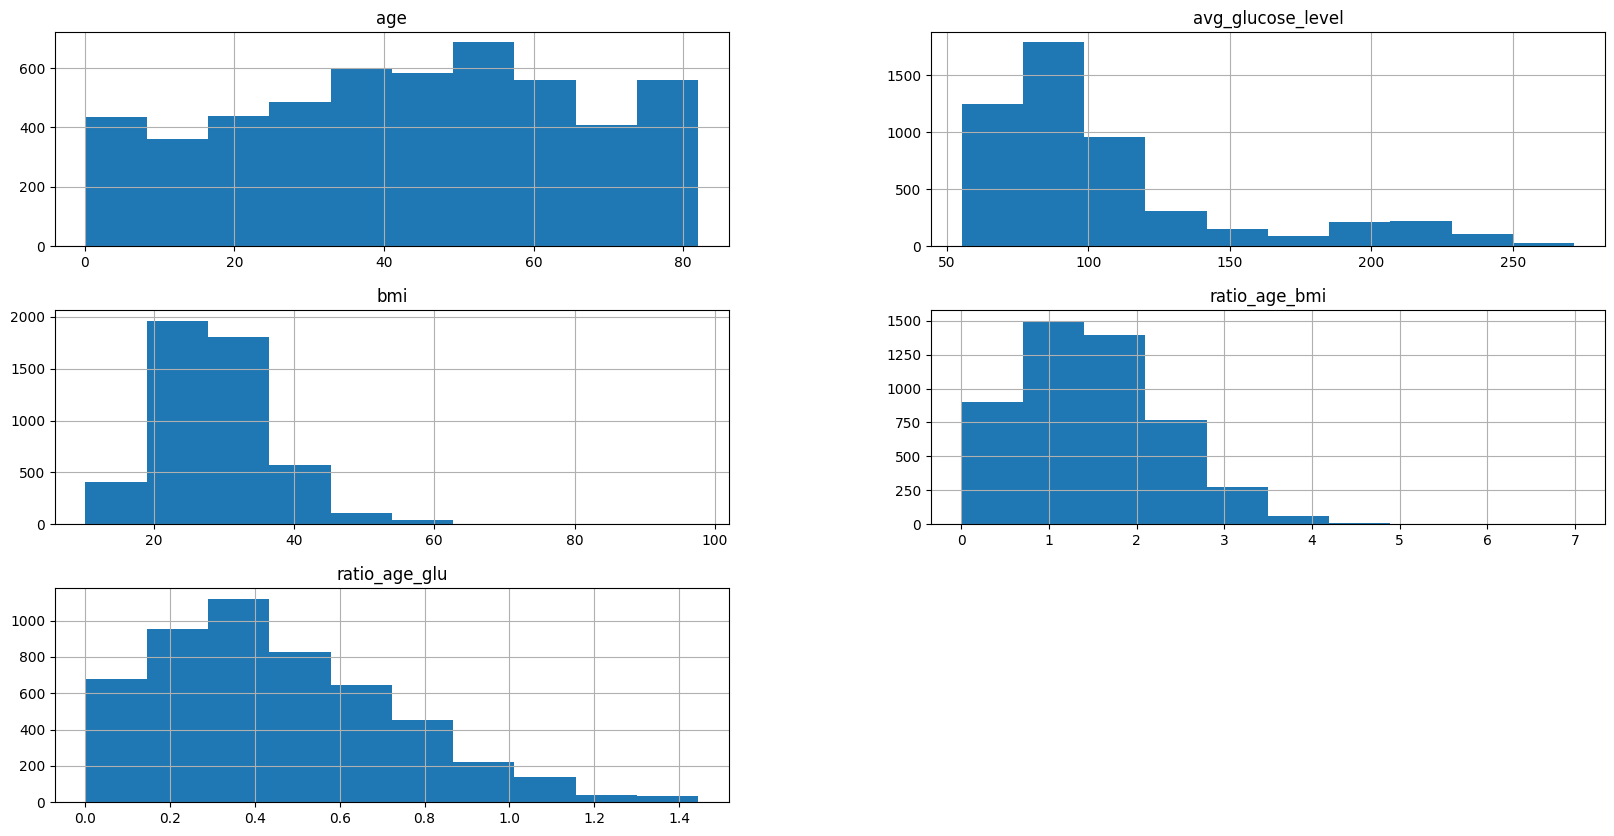

In [173]:
X[varc].hist(figsize=(20,10))

### Valores Aussentes

In [174]:
miss = 1 - X[varc].describe().T[['count']] / len(X)

In [175]:
miss*100

,count
age,0.000000
avg_glucose_level,0.000000
bmi,3.933464
ratio_age_bmi,3.933464
ratio_age_glu,0.000000


In [176]:
X.shape , X.dropna().shape , X.dropna().shape[0] / X.shape[0]

((5110, 5), (4909, 5), 0.960665362035225)

### Imputación 

In [177]:
im = SimpleImputer(strategy='mean')

In [178]:
im.fit(X)

SimpleImputer()

In [179]:
X[varc] = im.transform(X[varc])

In [180]:
X.shape , X.dropna().shape , X.dropna().shape[0] / X.shape[0]

((5110, 5), (5110, 5), 1.0)

### Validación de distribución alterada

In [181]:
pd.DataFrame( map( lambda v: (v , ks_2samp(df[v].dropna() , X[v] ).statistic ) , varc  ) , columns=['var','ks']  )

,var,ks
0,age,0.000000
1,avg_glucose_level,0.000000
2,bmi,0.021610
3,ratio_age_bmi,0.020729
4,ratio_age_glu,0.000000


In [182]:
# Si el valor de KS > .1 se elimina la variable, es una variable ROTA! (Se alteró  la distribución_)

### Varianza

In [183]:
vt = VarianceThreshold(threshold=1.0)

In [184]:
vt.fit(X[varc])

VarianceThreshold(threshold=1.0)

In [185]:
sin_varianza = [v for v,u in zip( varc , vt.get_support() ) if not(u) ]

In [186]:
sin_varianza

['ratio_age_bmi', 'ratio_age_glu']

array([[<AxesSubplot:title={'center':'ratio_age_bmi'}>,
        <AxesSubplot:title={'center':'ratio_age_glu'}>]], dtype=object)

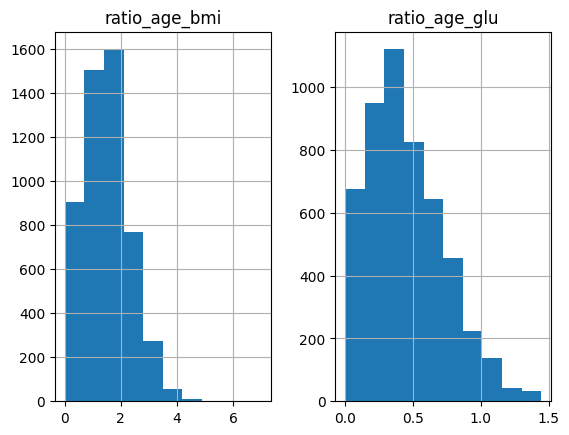

In [187]:
X[sin_varianza].hist()

In [188]:
X.drop( sin_varianza , axis=1 , inplace=True)

In [189]:
varc = [v for v in varc if v not in sin_varianza]

In [190]:
len(varc), varc

(3, ['age', 'avg_glucose_level', 'bmi'])

### Valores Extremos

In [191]:
ext = X[varc].describe( percentiles=[.01,.99] ).T[['1%','99%']].reset_index()

for v, li, ls in ext.values:
    X[f'ol_{v}'] = (( X[v] < li ) | ( X[v] > ls )).astype(int)
    
X['ext'] = X.filter(like='ol_').max(axis=1)

X.drop(X.filter(like='ol_').columns, axis=1, inplace=True)

In [192]:
X['ext'].value_counts(True)*100

0    95.18591
1     4.81409
Name: ext, dtype: float64

In [193]:
X[um] = df[um]

In [194]:
X = X.loc[X['ext'] == 0].reset_index(drop=True).drop(['ext'],axis=1)

In [195]:
print(X.shape)
X.head()

(4864, 4)


,age,avg_glucose_level,bmi,id
0,67.0,228.69,36.600000,9046
1,61.0,202.21,28.893237,51676
2,80.0,105.92,32.500000,31112
3,49.0,171.23,34.400000,60182
4,79.0,174.12,24.000000,1665


### Análisis Bivariado

In [196]:
X[varc].corr()

,age,avg_glucose_level,bmi
age,1.000000,0.218482,0.324577
avg_glucose_level,0.218482,1.000000,0.169822
bmi,0.324577,0.169822,1.000000


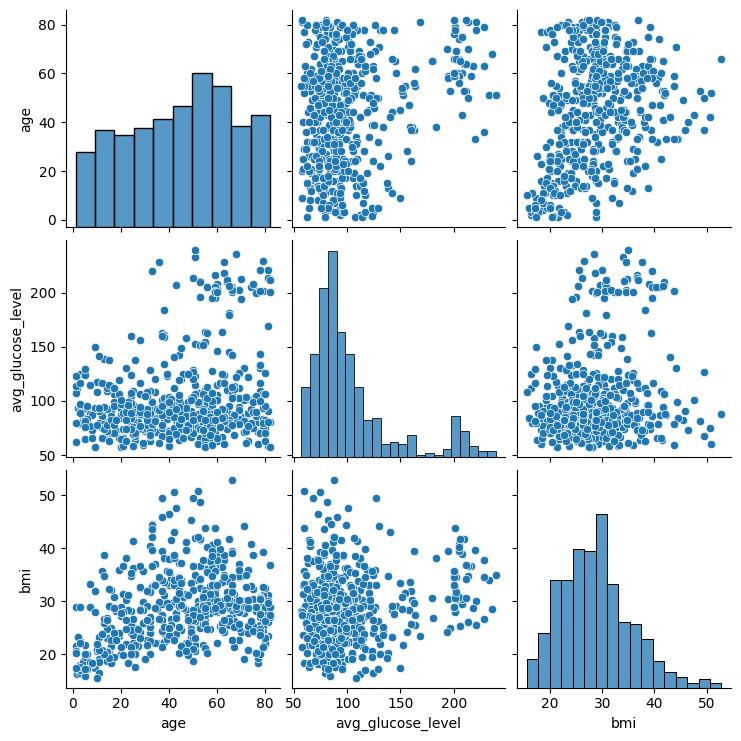

In [197]:
sns.pairplot(X[varc].sample(500))

### Multicolinealidad

In [198]:
vc = VarClusHi( df=X[varc] , feat_list=varc )

In [199]:
vc.varclus()

In [200]:
rs = vc.rsquare
rs = rs.sort_values(by=['Cluster','RS_Ratio'] , ascending=[1,1]).reset_index(drop=True)

In [201]:
rs['id'] = rs.groupby('Cluster').cumcount() + 1

In [202]:
rs

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio,id
0,0,age,0.585555,0,0.414445,1
1,0,bmi,0.531078,0,0.468922,2
2,0,avg_glucose_level,0.364964,0,0.635036,3


In [203]:
varc = rs.loc[ rs['id'] == 1 ]['Variable'].tolist()

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

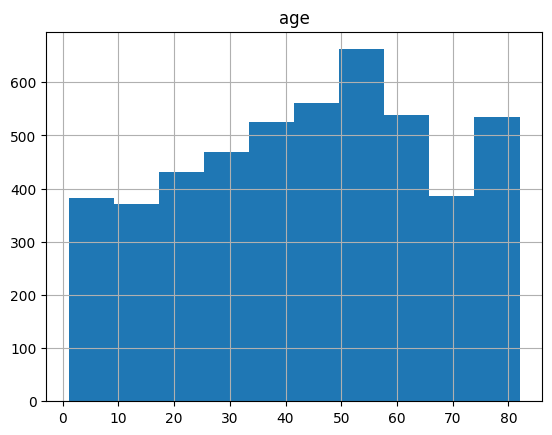

In [204]:
X[varc].hist()

### Discretizar

In [205]:
for v in varc:
    for k in range(2,7):
        X = discretizar(X, v, k)

In [206]:
X.shape

(4864, 9)

In [207]:
X

,age,avg_glucose_level,bmi,id,d_age_2,d_age_3,d_age_4,d_age_5,d_age_6
0,67.0,228.69,36.600000,9046,"(45.0, 82.0]","(56.0, 82.0]","(61.0, 82.0]","(65.0, 82.0]","(56.0, 68.0]"
1,61.0,202.21,28.893237,51676,"(45.0, 82.0]","(56.0, 82.0]","(45.0, 61.0]","(52.0, 65.0]","(56.0, 68.0]"
2,80.0,105.92,32.500000,31112,"(45.0, 82.0]","(56.0, 82.0]","(61.0, 82.0]","(65.0, 82.0]","(68.0, 82.0]"
3,49.0,171.23,34.400000,60182,"(45.0, 82.0]","(33.0, 56.0]","(45.0, 61.0]","(38.0, 52.0]","(45.0, 56.0]"
4,79.0,174.12,24.000000,1665,"(45.0, 82.0]","(56.0, 82.0]","(61.0, 82.0]","(65.0, 82.0]","(68.0, 82.0]"
...,...,...,...,...,...,...,...,...,...
4859,80.0,83.75,28.893237,18234,"(45.0, 82.0]","(56.0, 82.0]","(61.0, 82.0]","(65.0, 82.0]","(68.0, 82.0]"
4860,81.0,125.20,40.000000,44873,"(45.0, 82.0]","(56.0, 82.0]","(61.0, 82.0]","(65.0, 82.0]","(68.0, 82.0]"
4861,35.0,82.99,30.600000,19723,"(1.0790000000000002, 45.0]","(33.0, 56.0]","(26.0, 45.0]","(22.0, 38.0]","(33.0, 45.0]"
4862,51.0,166.29,25.600000,37544,"(45.0, 82.0]","(33.0, 56.0]","(45.0, 61.0]","(38.0, 52.0]","(45.0, 56.0]"


In [208]:
vari = X.filter(like='d_').columns.tolist()

In [209]:
len(vari), vari

(5, ['d_age_2', 'd_age_3', 'd_age_4', 'd_age_5', 'd_age_6'])

## Poder predictivo

In [210]:
X = X[um+vari].merge( df[um+varn] , on = um , how='left' ).reset_index(drop=True)
y = X[um].merge(df[um+tgt], on = um, how='left').reset_index(drop=True)

In [211]:
print(X.shape)
X.head()

(4864, 13)


,id,d_age_2,d_age_3,d_age_4,d_age_5,d_age_6,n_gender,n_hypertension,n_heart_disease,n_ever_married,n_work_type,n_Residence_type,n_smoking_status
0,9046,"(45.0, 82.0]","(56.0, 82.0]","(61.0, 82.0]","(65.0, 82.0]","(56.0, 68.0]",Male,0,1,Yes,Private,Urban,formerly smoked
1,51676,"(45.0, 82.0]","(56.0, 82.0]","(45.0, 61.0]","(52.0, 65.0]","(56.0, 68.0]",Female,0,0,Yes,Self-employed,Rural,never smoked
2,31112,"(45.0, 82.0]","(56.0, 82.0]","(61.0, 82.0]","(65.0, 82.0]","(68.0, 82.0]",Male,0,1,Yes,Private,Rural,never smoked
3,60182,"(45.0, 82.0]","(33.0, 56.0]","(45.0, 61.0]","(38.0, 52.0]","(45.0, 56.0]",Female,0,0,Yes,Private,Urban,smokes
4,1665,"(45.0, 82.0]","(56.0, 82.0]","(61.0, 82.0]","(65.0, 82.0]","(68.0, 82.0]",Female,1,0,Yes,Self-employed,Rural,never smoked


In [212]:
print(y.shape)
y.head()

(4864, 2)


,id,stroke
0,9046,1
1,51676,1
2,31112,1
3,60182,1
4,1665,1


### Separar Datos

In [213]:
Xt, Xv, yt, yv = train_test_split( X, y, train_size = 0.7 )

In [214]:
Xt.shape, Xv.shape, yt.shape, yv.shape

((3404, 13), (1460, 13), (3404, 2), (1460, 2))

In [215]:
Xt = Xt.merge( yt , on = um , how='inner' ).reset_index(drop=True)

## Mejores variables - Discretizadas

In [216]:
iv = pd.DataFrame(map( lambda v: calculo_iv( Xt, v , tgt , um[0] ) , vari  ) , columns=['variable','iv'])

In [217]:
iv['raiz'] = iv['variable'].map( lambda x: '_'.join(x.split('_')[1:-1]  ) )

In [218]:
iv = iv.sort_values(by=['raiz','iv'],ascending=[1,0]).reset_index(drop=True)

In [219]:
iv['id'] = iv.groupby('raiz').cumcount()+1

In [220]:
iv

,variable,iv,raiz,id
0,d_age_6,inf,age,1
1,d_age_5,2.192078,age,2
2,d_age_3,2.151389,age,3
3,d_age_4,1.999924,age,4
4,d_age_2,1.602954,age,5


In [109]:
iv = iv.loc[iv['id']==1]

In [111]:
besti = iv['variable'].tolist()

In [112]:
len(besti), besti

(1, ['d_age_6'])

## Mejores variables - Normalizadas

In [114]:
ivd = pd.DataFrame(map( lambda v: calculo_iv( Xt, v , tgt , um[0] ) , varn  ) , columns=['variable','iv'])

In [115]:
ivd

,variable,iv
0,n_gender,0.001424
1,n_hypertension,0.170747
2,n_heart_disease,0.140065
3,n_ever_married,0.280559
4,n_work_type,0.328914
5,n_Residence_type,0.008034
6,n_smoking_status,0.100563


In [116]:
iv = pd.concat( [ivd, iv] , ignore_index=True )

In [117]:
iv

,variable,iv,raiz,id
0,n_gender,0.001424,NaN,NaN
1,n_hypertension,0.170747,NaN,NaN
2,n_heart_disease,0.140065,NaN,NaN
3,n_ever_married,0.280559,NaN,NaN
4,n_work_type,0.328914,NaN,NaN
5,n_Residence_type,0.008034,NaN,NaN
6,n_smoking_status,0.100563,NaN,NaN
7,d_age_6,inf,age,1.0


In [118]:
iv = iv.loc[ ~np.isinf(iv['iv']) ].reset_index()

In [120]:
iv = iv[['variable','iv']].sort_values(by='iv',ascending=False).reset_index(drop=True)

In [121]:
iv

,variable,iv
0,n_work_type,0.328914
1,n_ever_married,0.280559
2,n_hypertension,0.170747
3,n_heart_disease,0.140065
4,n_smoking_status,0.100563
5,n_Residence_type,0.008034
6,n_gender,0.001424


In [122]:
best = iv.loc[ (iv['iv'] > 0.08 ) & ( iv['iv'] < 0.3 ) ]['variable'].tolist()

In [123]:
len(best) , best

(4,
 ['n_ever_married', 'n_hypertension', 'n_heart_disease', 'n_smoking_status'])

## Transformación WoE

In [124]:
X = X[um + best].reset_index(drop=True)
X.shape , y.shape

((4864, 5), (4864, 2))

### Partimos datos

In [125]:
Xt, Xv, yt, yv = train_test_split( X, y, train_size = 0.7 )

In [126]:
Xt.shape, Xv.shape, yt.shape, yv.shape

((3404, 5), (1460, 5), (3404, 2), (1460, 2))

In [127]:
Xt = Xt.merge( yt , on = um , how='inner' ).reset_index(drop=True)

## Mapa WoE

In [129]:
mapa_woe = list( map( lambda v: codificacion_woe( Xt, v , tgt , um[0] ) , best )  ) 

In [141]:
mapa_woe

[('n_ever_married', {'No': 0.8705535177821951, 'Yes': -0.2652555128675033}),
 ('n_hypertension', {'0': 0.21228945642732047, '1': -1.0821713873153183}),
 ('n_heart_disease', {'0': 0.1272831517612676, '1': -1.2168201905945717}),
 ('n_smoking_status',
  {'Unknown': 0.2769162148981646,
   'formerly smoked': -0.540343450977734,
   'never smoked': 0.19138691823751366,
   'smokes': -0.10714584222060344})]

In [130]:
for v, mapa in mapa_woe:
    Xt[f'w_{v}'] = Xt[v].replace(mapa)
    Xv[f'w_{v}'] = Xv[v].replace(mapa)

In [131]:
varw = Xt.filter(like='w_').columns.tolist()

In [133]:
len(varw), varw

(4,
 ['w_n_ever_married',
  'w_n_hypertension',
  'w_n_heart_disease',
  'w_n_smoking_status'])

## TAD

In [135]:
tad = Xt[um + varw].merge(yt, on=um, how='inner').reset_index(drop=True)

In [140]:
tad[tgt].value_counts()

stroke
0         3237
1          167
dtype: int64

In [221]:
tad

,id,w_n_ever_married,w_n_hypertension,w_n_heart_disease,w_n_smoking_status,stroke
0,11908,-0.265256,0.212289,0.127283,-0.540343,0
1,6928,-0.265256,0.212289,0.127283,0.191387,0
2,53195,0.870554,0.212289,0.127283,0.191387,0
3,35330,-0.265256,0.212289,0.127283,-0.107146,0
4,17827,-0.265256,0.212289,0.127283,-0.540343,0
...,...,...,...,...,...,...
3399,55591,-0.265256,0.212289,0.127283,0.191387,0
3400,5464,-0.265256,0.212289,0.127283,0.276916,0
3401,65116,-0.265256,-1.082171,0.127283,-0.107146,0
3402,13365,-0.265256,0.212289,0.127283,-0.107146,0
